# CPS 803 / CP 8318
# Assignment 1 - [Your Name Here] - [StudentID]
## Part 1 [20 Marks]

[6 Marks] 
# a

Write a simple implementation of a least-squares solution to linear regression that applies an iterative update to adjust the weights. Demonstrate the success of your approach on the sample data loaded below, and visualize the best fit plotted as a line (consider using linspace) against a scatter plot of the x and y test values.


In [1]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]




[[152.96500841]
 [840.87777903]]


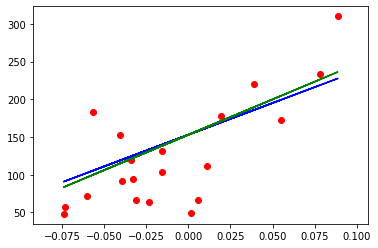

In [35]:
##### YOUR CODE HERE #######

import matplotlib.pyplot as plt



samples = len(diabetes_X_train)
iterations = 10000
lr = 0.1

X= np.c_[np.ones((samples,1)),diabetes_X_train]
X_test = np.c_[np.ones((len(diabetes_X_test),1)),diabetes_X_test]
y= diabetes_y_train.reshape(samples,1)

weights = np.random.randn(2,1)


for i in range(iterations):
    sum = X.T.dot(X.dot(weights) - y)
    weights = weights - (lr/samples)*sum


print(weights)

#Using Sklearn
reg1 = linear_model.LinearRegression()
reg.fit(diabetes_X_train,diabetes_y_train)
preds1 = reg.predict (diabetes_X_test)

#Using gradiant descent from scratch
reg = linear_model.LinearRegression()
reg.fit(X,X.dot(weights))

preds = reg.predict(X_test)
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'red')
plt.plot(diabetes_X_test,preds,color = 'blue')
plt.plot(diabetes_X_test,preds1,color = 'green')
plt.show()



[2 Marks]
# b

Load data on movie ratings, revenue, metadata etc. Split data into a relevant set for training, testing and classification. Explain your choice of split. It is ok if you decide to split into these subsets after part c -> if you do so, mention this at the end of your explanation.

Explanation:


In [40]:
### An example to load a csv file
import pandas as pd 
import numpy as np
from ast import literal_eval
meta_data=pd.read_csv('movies_metadata.csv', low_memory=False) # You may wish to specify types, or process columns once read
ratings_small=pd.read_csv('ratings_small.csv')
import warnings; warnings.simplefilter('ignore')

##### YOUR CODE HERE #######

print(meta_data.head(10))


   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
5  False                                                NaN  60000000   
6  False                                                NaN  58000000   
7  False                                                NaN         0   
8  False                                                NaN  35000000   
9  False  {'id': 645, 'name': 'James Bond Collection', '...  58000000   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'R

[5 Marks]
# c

Organize the data into relevant features for predicting revenue. <br>
i.  Explain your feature sets and organization. <br>

YOUR EXPLANATION HERE

ii. Plot movie revenue vs. rating as a scatter plot and discuss your findings. <br>

YOUR EXPLANATION HERE

iii. Visualize any other relationships you deem interesting and explain. <br>

YOUR EXPLANATION HERE


In [5]:
meta_data.head()
# The following line is one way of cleaning up the genres field - there are more verbose ways of doing this that are easier for a human to read
#meta_data['genres'] = meta_data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
#meta_data['year'] = pd.to_datetime(meta_data['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
#meta_data.head()
# Consider how to columns look before and after this 'clean-up' - it is very common to have to massage the data to get the right features

##### YOUR CODE HERE #######

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


[3 Marks]
# d

Train a regression model to predict movie revenue. Plot predicted revenue vs. actual revenue on the test set. Quantify the error in your prediction. (You may use sklearn for this step)

In [21]:
# Regression model here, plot your fit to the revenue data versus the actual data from the test set as a scatter plot.

##### YOUR CODE HERE #######

[4 Marks]
# e

Try a non-linear fit to the data, with and without regularization. Find your best fit and justify the choice of parameters, regularization constant and norm. Plot predicted revenue vs. actual revenue on the test set. In each case, quantify the error. (See e.g. Generalized linear models, Kernel Ridge regression, SVR and others from sklearn)

In [22]:
##### YOUR CODE HERE WITHOUT REGULARIZATION #######

In [23]:
##### YOUR CODE HERE WITH REGULARIZATION #######

## Part 2 [10 Marks]

[4 Marks]
# a

Write a simple version of the basic algorithm for k-means clustering. Simple here means the core of the algorithm and not optimizations or extensions you might find in standard python libraries. Typically you might rely on a standard library for doing this, but it helps to see the core by manipulating the data and labels by hand as practice for numerical python and how to frame the algorithm.

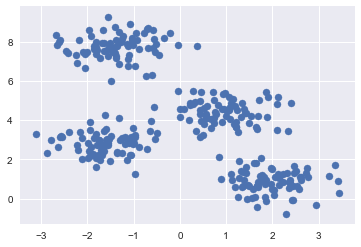

In [6]:
# Import packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np


# Generate Samples
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

###############################################
# YOUR CODE GOES HERE
# Put some code to find clusters here
# Assign the clusters and labels in your code
###############################################




# Uncomment to display clusters and cluster centers
#plt.scatter(X[:, 0], X[:, 1], c=labels,
#            s=50, cmap='viridis');
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

<a id="data set"></a>
[6 Marks]
# b

Load the mystery data below, and cluster the data (you don't need to use your code from part a). Visualize the data including assigned cluster labels.

In [7]:
# Load the mystery data here and cluster using k-means (now you can use libraries e.g. sklearn)
mystery = np.load('mystery.npy')
mystery.shape

(30309, 784)

In [26]:
# Find a way to visualize the data (e.g. in 2D or 3D), color datapoints based on assigned labels.


Based on the results above and any other analysis you wish to include, discuss how many clusters you see in the data.

YOUR EXPLANATION HERE

(any additional code supporting your assertion on the number of clusters may be included below)

In [27]:
##### YOUR (OPTIONAL) CODE HERE #######

[2 Marks]
# Bonus

What is the mystery data in part 2? Show this in markdown and code below.

EXPLANATION HERE, code goes below.

In [28]:
##### YOUR (OPTIONAL) CODE HERE #######

[10 Marks]
# CP 8318 Questions

Describe how you might implement a solution to recommend new movies to a user based on their existing preferences or ratings from Part 1.

YOUR EXPLANATION HERE, provide an example for one user id below.

In [29]:
##### YOUR CODE HERE #######
